
... ***CURRENTLY UNDER DEVELOPMENT*** ...


## Simulate Astronomical Tide using UTIDE library

inputs required: 
  * Astronomical Tide historical time series at the study site 

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# basic import
import os
import os.path as op

# python libs
import numpy as np
import xarray as xr
from datetime import datetime, timedelta
import matplotlib

# custom libs
import utide # https://github.com/wesleybowman/UTide

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.plotting.tides import Plot_AstronomicalTide, Plot_ValidateTTIDE, Plot_Validate_scatter



## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/albacid/Projects/TeslaKit_projects'
db = Database(p_data)

# set site
db.SetSite('ROI')


In [3]:
# --------------------------------------
# Load astronomical tide historical and set simulation dates

_, TIDE_astro = db.Load_TIDE_hist()  # astronomical tide historical data
TIDE = TIDE_astro.predicted

# TG latitude
lat0 = 9.75

# Simulation dates (years)
y1_sim = 2000
y2_sim = 3000



## Astronomical Tide

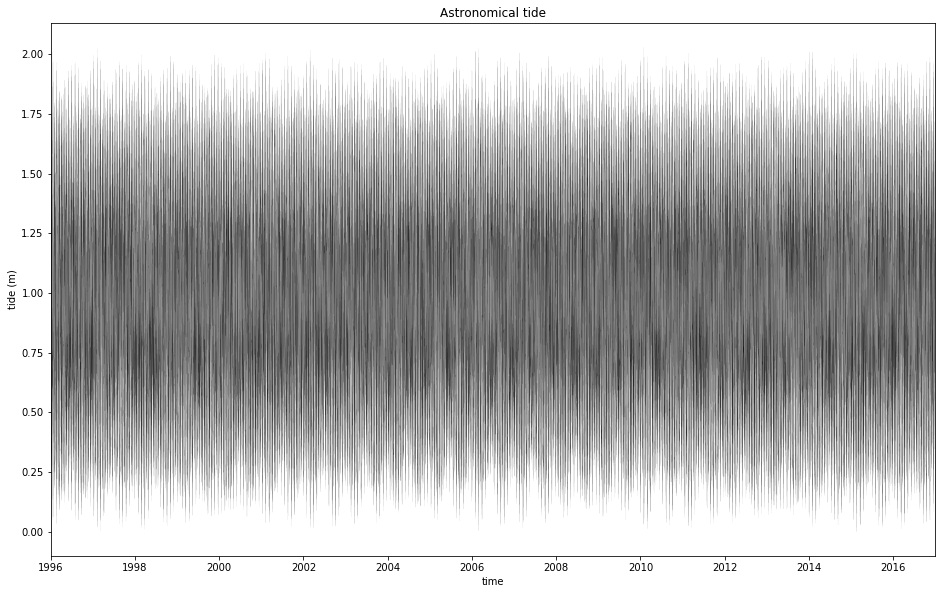

In [4]:
# --------------------------------------
# astronomical tide data

# remove tide nanmin
TIDE = TIDE - np.nanmin(TIDE)

# Plot astronomical tide
time = TIDE.time.values[:]
tide = TIDE.values[:]

Plot_AstronomicalTide(time, tide);



## Astronomical Tide - Fitting

solve: matrix prep ... solution ... diagnostics ... done.
prep/calcs ... done.


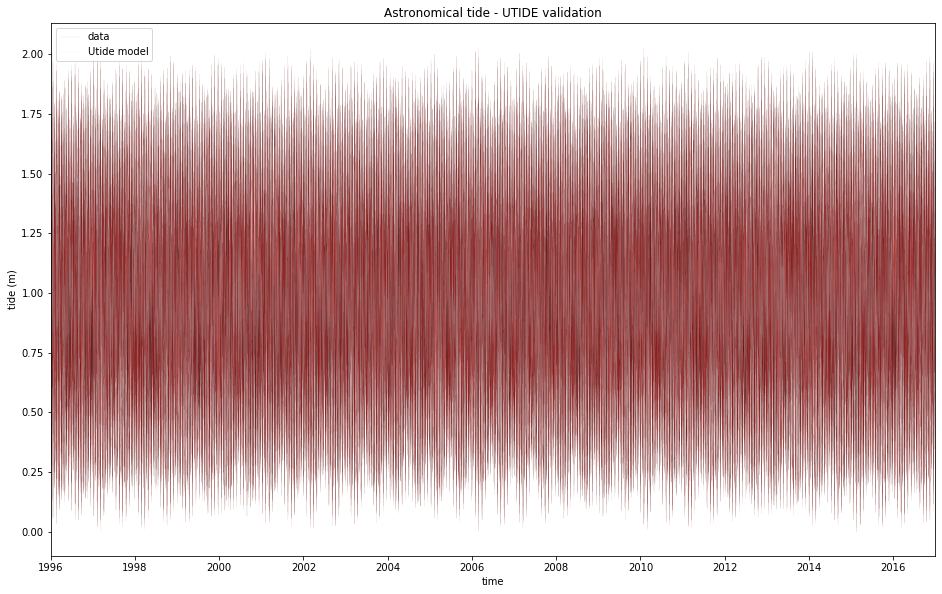

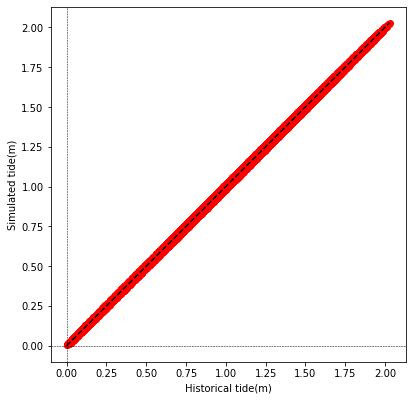

In [5]:
# --------------------------------------
# Utide library - Validation
coef = utide.solve(
    matplotlib.dates.date2num(time), tide,
    lat=lat0,
    nodal=True,
    method='ols',
    conf_int='MC'
)

tide_tt = utide.reconstruct(matplotlib.dates.date2num(time), coef).h

# Plot validation 
Plot_ValidateTTIDE(time, tide, tide_tt);
Plot_Validate_scatter(tide, tide_tt, 'Historical tide(m)', 'Simulated tide(m)');



## Astronomical Tide - Prediction

In [6]:
# --------------------------------------
# Utide library - Prediction

def utide_pred_one_year(y):
    'Predicts one year using utide library (to avoid kernel error)'
    
    # make hourly array (one year)
    d_pred = np.arange(
        np.datetime64('{0}-01-01'.format(y)), np.datetime64('{0}-01-01'.format(y+1)),
        dtype='datetime64[h]'
    )

    # reconstruct tide using utide
    return utide.reconstruct(matplotlib.dates.date2num(d_pred), coef).h


# use utide for every year
atide_pred = np.concatenate([utide_pred_one_year(y) for y in range(y1_sim, y2_sim)])

date_pred = np.arange(
    np.datetime64('{0}-01-01'.format(y1_sim)), np.datetime64('{0}-01-01'.format(y2_sim)), 
    dtype='datetime64[h]'
).astype(datetime)

# use xarray
ASTRO_sim = xr.Dataset({'astro' :(('time',), atide_pred)}, {'time' : date_pred})
print(ASTRO_sim)
    
# store astronomical tide simulation
db.Save_TIDE_sim_astro(ASTRO_sim)


prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ..

prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ..

prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ..

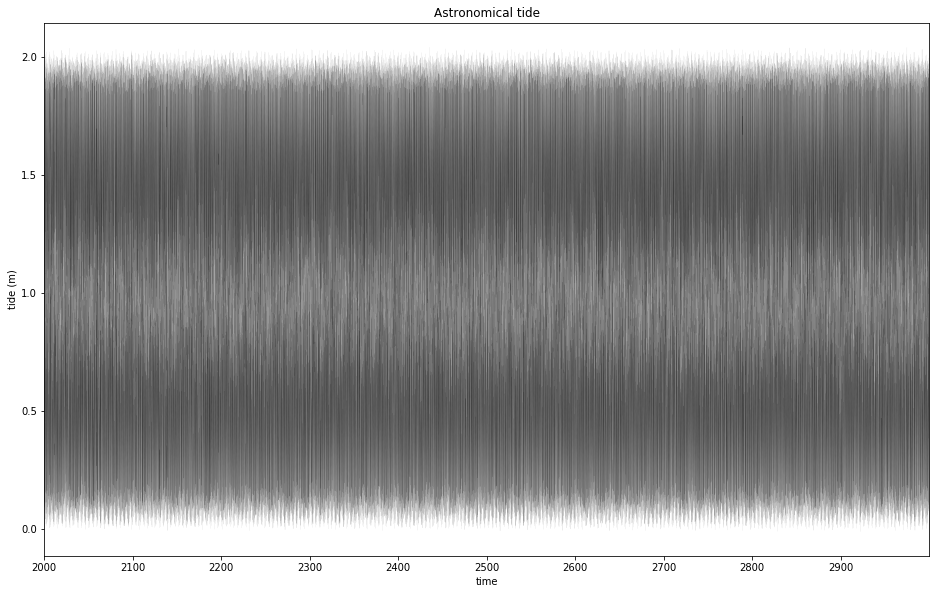

In [7]:
# Plot astronomical tide prediction
Plot_AstronomicalTide(ASTRO_sim.time.values[:], ASTRO_sim.astro.values[:]);
